In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots


In [15]:
# Load the dataset
df = pd.read_csv('imdb-movies-dataset.csv')


In [16]:

# Data Cleaning
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce')
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)
df.dropna(subset=['Rating', 'Metascore'], inplace=True)


In [17]:

# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number])


In [18]:

# Exploratory Data Analysis (EDA)
print("Dataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 7555 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Poster          7555 non-null   object 
 1   Title           7555 non-null   object 
 2   Year            7464 non-null   float64
 3   Certificate     6480 non-null   object 
 4   Duration (min)  7555 non-null   float64
 5   Genre           7555 non-null   object 
 6   Rating          7555 non-null   float64
 7   Metascore       7555 non-null   float64
 8   Director        7555 non-null   object 
 9   Cast            7554 non-null   object 
 10  Votes           7555 non-null   float64
 11  Description     7555 non-null   object 
 12  Review Count    7554 non-null   object 
 13  Review Title    7536 non-null   object 
 14  Review          7536 non-null   object 
dtypes: float64(5), object(10)
memory usage: 944.4+ KB
None


In [19]:

print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
              Year  Duration (min)       Rating    Metascore         Votes
count  7464.000000     7555.000000  7555.000000  7555.000000  7.555000e+03
mean   2006.067524      109.565850     6.548471    58.068299  1.185726e+05
std      18.521087       20.369385     0.944830    17.845240  1.987969e+05
min    1929.000000       51.000000     1.900000     1.000000  2.300000e+01
25%    1997.000000       96.000000     6.000000    45.500000  2.167950e+04
50%    2012.000000      106.000000     6.600000    58.000000  5.235500e+04
75%    2021.000000      119.000000     7.200000    71.000000  1.275445e+05
max    2025.000000      566.000000     9.300000   100.000000  2.894940e+06


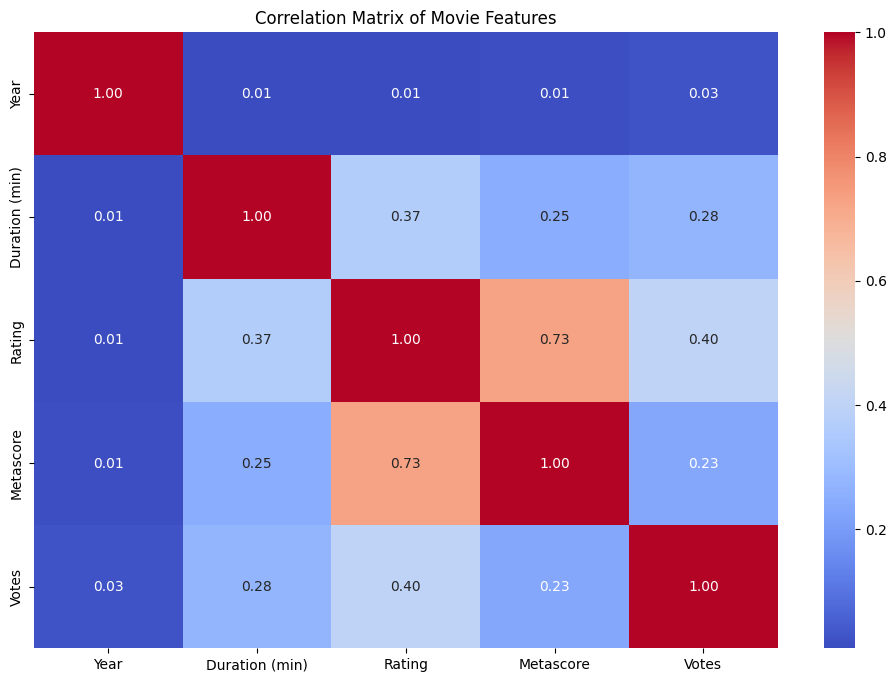

In [20]:

# Advanced Visualizations
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Movie Features')
plt.show()


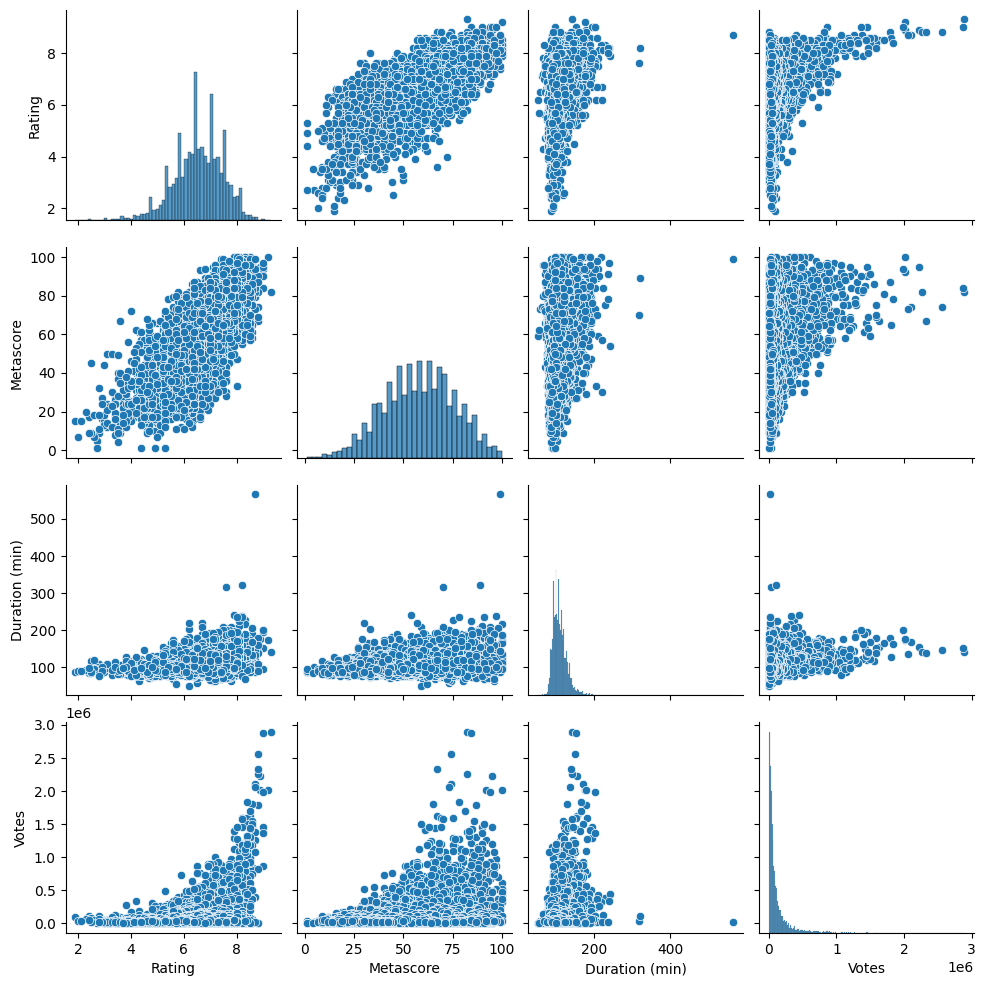

In [21]:

# Pairplot for selected features
sns.pairplot(numeric_cols[['Rating', 'Metascore', 'Duration (min)', 'Votes']])
plt.show()


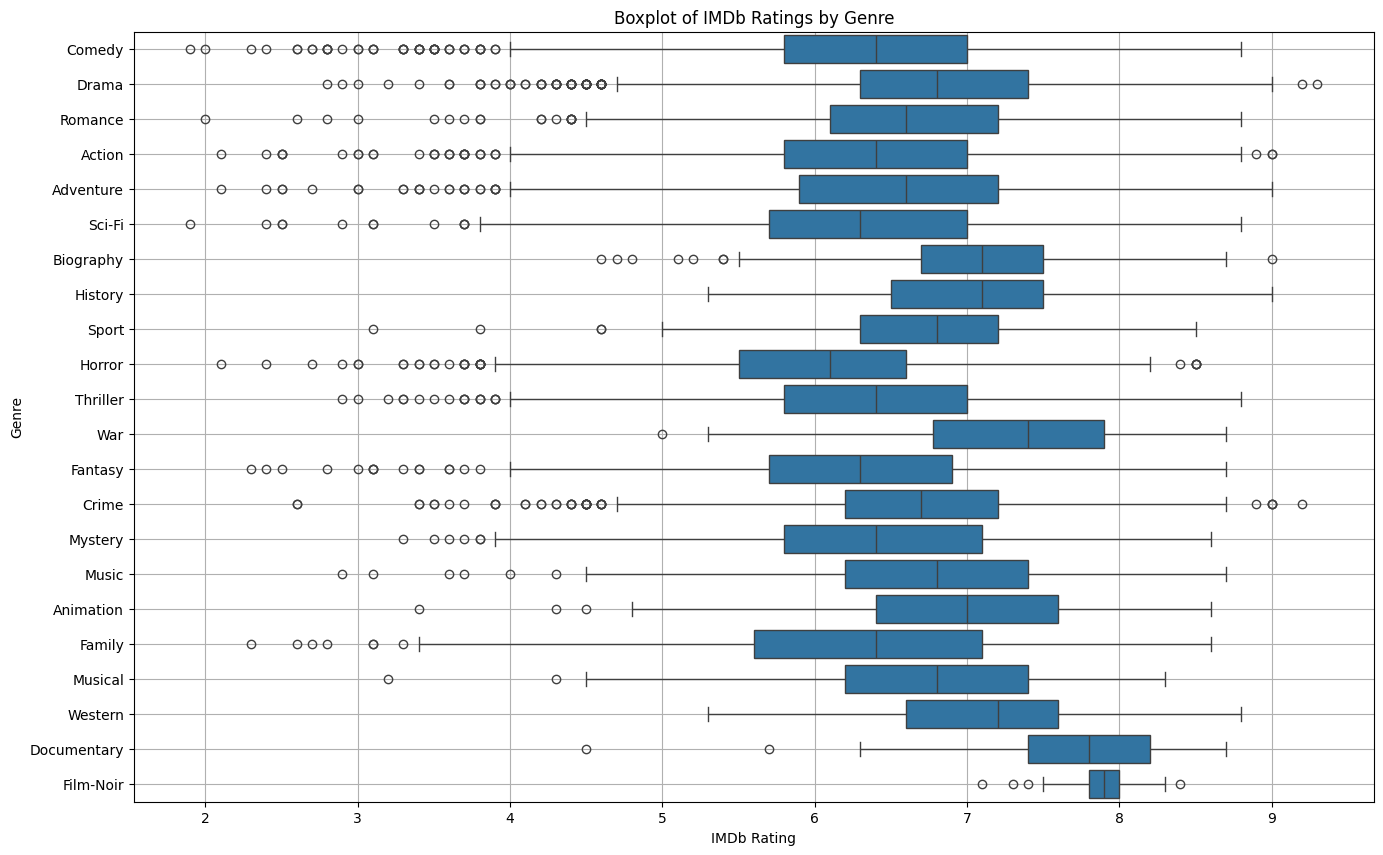

In [22]:

# Boxplot of ratings by genre
df['Genre'] = df['Genre'].str.split(', ')
genres_exploded = df.explode('Genre')
plt.figure(figsize=(16, 10))
sns.boxplot(data=genres_exploded, x='Rating', y='Genre')
plt.title('Boxplot of IMDb Ratings by Genre')
plt.xlabel('IMDb Rating')
plt.ylabel('Genre')
plt.grid(True)
plt.show()


In [23]:

# Interactive Plotly Visualizations
# Scatter plot for Rating vs. Metascore
fig = px.scatter(df, x='Rating', y='Metascore', title='IMDb Rating vs. Metascore')
fig.show()


In [24]:

# Hypothesis Testing: Higher-rated movies tend to have higher metascores
pearson_corr, p_value = pearsonr(df['Rating'], df['Metascore'])
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: 0.7261415844919286
P-value: 0.0


In [25]:

# T-test for genre impact on ratings (example: Action vs. Drama)
action_ratings = genres_exploded[genres_exploded['Genre'] == 'Action']['Rating']
drama_ratings = genres_exploded[genres_exploded['Genre'] == 'Drama']['Rating']
t_stat, t_p_value = ttest_ind(action_ratings.dropna(), drama_ratings.dropna())
print(f"T-test between Action and Drama ratings: T-stat={t_stat}, P-value={t_p_value}")


T-test between Action and Drama ratings: T-stat=-17.313579035469797, P-value=1.4388165491774342e-65


In [26]:

# Predictive Modeling
# Prepare data
features = numeric_cols[['Duration (min)', 'Votes', 'Metascore']]
target = numeric_cols['Rating']


In [27]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [28]:

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [29]:

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.36710534943745865
R-squared: 0.569423648287049


In [30]:

# Feature importance
feature_importances = model.feature_importances_
features_list = features.columns
importance_df = pd.DataFrame({'Feature': features_list, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)


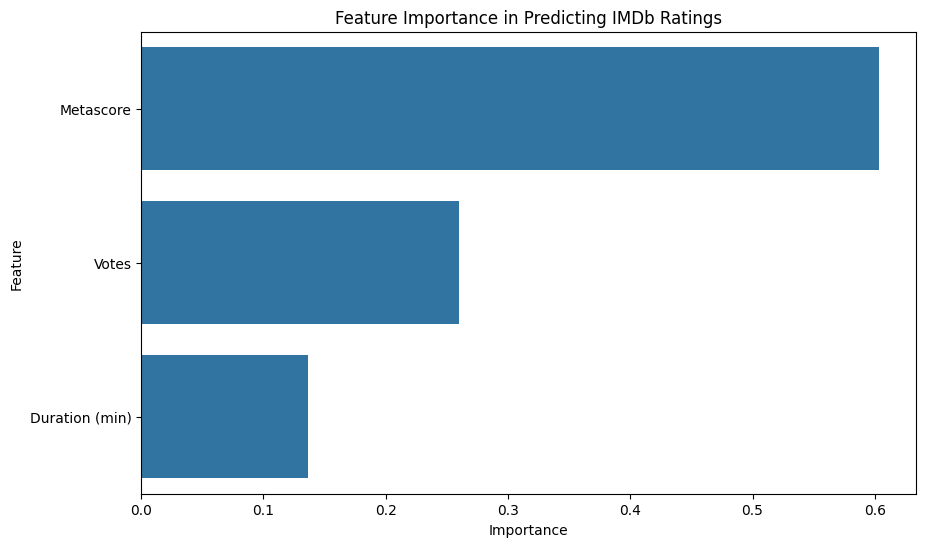

In [31]:

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Predicting IMDb Ratings')
plt.show()


In [32]:

# Interactive Dashboard with Plotly
# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Rating vs. Metascore', 'Feature Importance'))


In [33]:

# Add scatter plot
scatter = go.Scatter(x=df['Rating'], y=df['Metascore'], mode='markers')
fig.add_trace(scatter, row=1, col=1)


In [34]:

# Add bar plot
bar = go.Bar(x=importance_df['Importance'], y=importance_df['Feature'], orientation='h')
fig.add_trace(bar, row=1, col=2)


In [35]:

# Update layout
fig.update_layout(title_text='Interactive Dashboard')
fig.show()


In [36]:

# Function to predict single value
def predict_single_value(duration, votes, metascore):
    input_data = np.array([[duration, votes, metascore]])
    predicted_rating = model.predict(input_data)
    return predicted_rating[0]


In [37]:

# Example single value prediction
duration = 120  # example duration in minutes
votes = 150000  # example votes
metascore = 75  # example metascore

predicted_rating = predict_single_value(duration, votes, metascore)
print(f"Predicted IMDb Rating: {predicted_rating}")


Predicted IMDb Rating: 7.438


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

